In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
os.chdir('/workspace/')
plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font_scale = 1.5,font ='NanumGothic' )

In [2]:
DPATH = './data/'

df = pd.read_excel(DPATH+'대상분류 민원 리스트_20230918_20230929.xlsx')


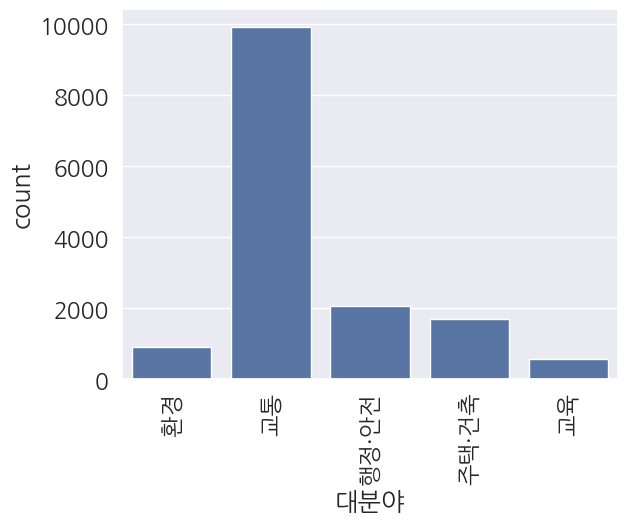

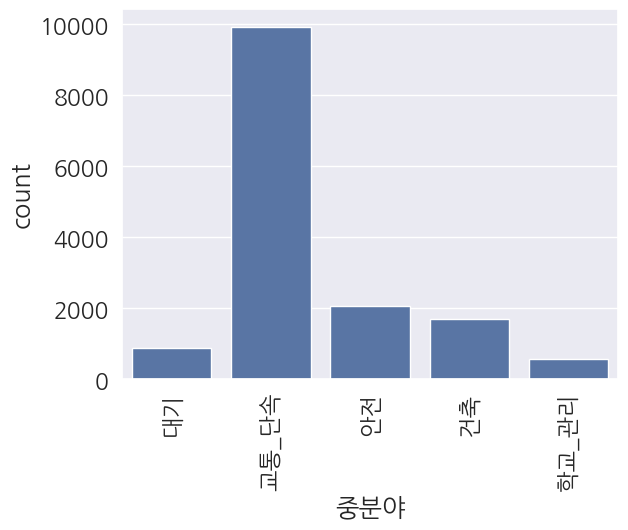

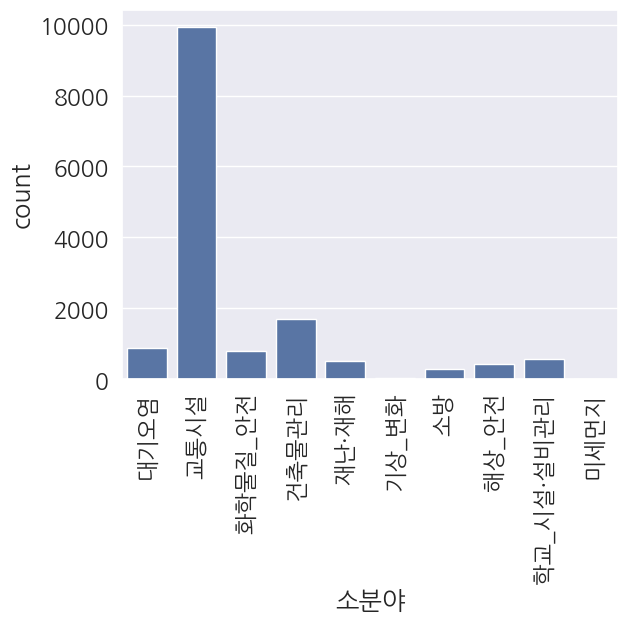

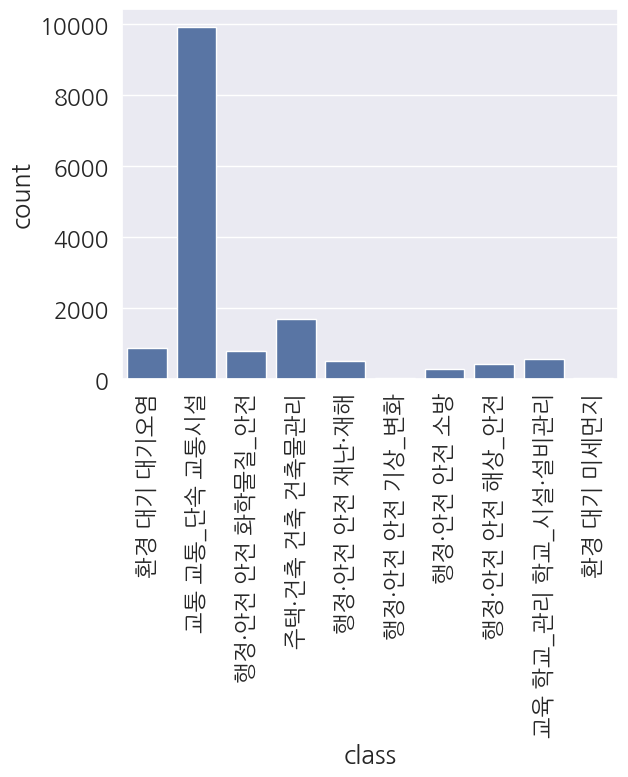

In [3]:
sns.countplot(data=df, x='대분야')
plt.xticks(rotation=90)

plt.show()
sns.countplot(data=df, x='중분야')
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=df, x='소분야')
plt.xticks(rotation=90)

plt.show()
df['class'] = df['대분야'] + ' ' + df['중분야'] + ' ' + df['소분야']
sns.countplot(data=df, x='class')
plt.xticks(rotation=90)
plt.show()

--> 클래스 imbalance


In [4]:
df_sample = df.sample(5000)
df_sample['class'] = df_sample['대분야'] + ' ' + df_sample['중분야'] + ' ' + df_sample['소분야']
# if number of class is too small, we can't use it.
for label in df_sample['class'].unique():
    if len(df_sample[df_sample['class']==label]) < 10:
        df_sample = df_sample[df_sample['class']!=label]

print(df_sample['class'].value_counts())    
df_sample.to_csv(DPATH+'sample.csv', index=False)

교통 교통_단속 교통시설          3277
주택·건축 건축 건축물관리          585
환경 대기 대기오염              272
행정·안전 안전 화학물질_안전        254
행정·안전 안전 재난·재해          181
교육 학교_관리 학교_시설·설비관리     180
행정·안전 안전 해상_안전          152
행정·안전 안전 소방              89
Name: class, dtype: int64


In [5]:
df.to_csv(DPATH+'data.csv', index=False)